<a href="https://colab.research.google.com/github/mdogruer905/ARIMA_Zaman_Serisi/blob/main/ARIMA_Zaman_Serisi_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="jumbotron">
  <h1 class="display-4"> ⌛ZAMAN SERİLERİ ⌛</h1>
  <p class="lead"></p>
  <hr class="my-4">
</div> Zaman serileri: Bir dönemden diğerine değişkenlerin değerlerinin ardışık bir 
şekilde gözlendiği sayısal büyüklüklerdir.Bu sayıların serisi verilerinin diğer seri verilerinden farklı olmasının en belirgin özelliği,zaman
süreci içeresinde serideki gözlem değerlerinin birbiri ile bağımlı olmasıdır.

Bununla alakalı olarak;

*   Bir fabrikadan ihraç edilen aylık ürün miktarları,
*   Bir karayolunda meydana gelen haftalık kaza sayıları,
*   Bir göldeki saatlik su seviyesi yüksekliği
*   Bir ülkenin yıllık ithalat ve ihracat miktarları, 
*   Yıllık işsizlik oranları gibi örneklendirilebilir.

**Zaman serileri analizleri değişken sayısına göre tek değişkenli ve çok değişkenli olmak üzere iki
başlık altında da incelenebilir.**


![](https://i0.wp.com/neptune.ai/wp-content/uploads/ARIMA.png?resize=826%2C330&ssl=1)

Tarihsel gözlemlere dayalı tahminler yapabilme yeteneği rekabet avantajı yaratır. Burada ki kritik kelime **Tahmin**'dir. **Tahmin** geçmiş ve şimdiki verilere dayanarak geleceğe ilişkin öngörülerde bulunma sürecidir. Bir zaman serisini analiz etmek için en yaygın kullanılan yöntem ARIMA(Autoregressive Integrated Moving Average) modelidir. ARIMA çeşitli(SARIMA,SARIMAX) modifikasyonları içerisinde bulundurur.

ARIMA, bir zaman serisinin zaman içinde ki seyrinden hareketle gelecek dönem tahmini(forecast) yaparken: 

1. Otoregresif(AutoRegresive, ya da AR)
2. Hareketli Ortalama(Moving Average, ya da MA) 
iki modeli birleştirir.

💡 ARMA (𝑝, 𝑞) modelleri en az parametre kullanımının
gerçekleştirilmesi ile zaman serisi modellerinde
esneklik sağlamak amacıyla kullanılmaktadır. Bu
amaçla model üzerinde hem otoregresif (AR) hem de
hareketli ortalama (MA) parametrelerinin ele alınması
model için yararlı olmaktadır. Böylece ARMA(𝑝,𝑞)
modeli oluşmaktadır.

**AR Modeli:** Cari dönemdeki ölçümün önceki dönemdeki bir ölçümle ilişkili olduğunu varsayar.Bir varlığın bugünkü fiyat hareketi önceki günlerde ki fiyat hareketleriyle ilişkilidir,bu nedenle haraketler birbirine bağımlı olacağından bugünkü fiyatını tahmin edebilirsiniz.
Örneğin **ARIMA** modeli için önemli olan seride ki bir gözlemin değerinin kaç dönem önceki değeri ile ilişkili olduğudur. Örneğin bugünkü $/₺ paritesi son 3 gün ile ilişki ise **AR(3)** modeli olarak adlandırılır

![](https://qph.fs.quoracdn.net/main-qimg-9153b14a731777ca520ef70211898a4a)

**MA Modeli:** Farklı bir yaklaşım söz konusudur. Cari dönemi tahmin etmek için önceki tahminlerin hata terimlerini kullanır. Cari dönem tahmini önceki birkaç hata teriminin ortalamasından kaynaklanır.
Örneğin **MA** için 20 gözlem değerlik bir veri olsun. Bu günü 20. olduğunu varsayarak önceki 19 gün için ağırlıklı ortalama modeli ile tahmin yapmak istediğimizde gerçek kur ile tahmin edilen kurun farkı alınarak tahmn yapar.Örneğin bugünkü $/₺ paritesi son 3 gün ile ilişki ise **MA(3)** modeli olarak adlandırılır.



<div class="jumbotron">
  <h1 class="display-4">ARIMA MODELİ VARSAYIMLARI</h1>
  <p class="lead"></p>
  <hr class="my-4">
  <p>ARIMA modelleri gelecek tahmini yapacağı serilerin varsayımlara sahip olduğunu varsayımını yapar. Varsayım sağlanmazsa modelin sonuçlarını tartışır hale getirir. Bu varsayımlar şunlardır;</p>
</div>


1.   Durağanlık (Stationarity) Varsayımı
      * Trenden Ayırma(Detrending)
      * Fark Durağan Süreç
      * Hareketli Ortalama(Rolling Means)
      * Logaritmik Dönüştürme
2.   Normallik ya da Normal Dağılım (Normal Distribution)
3. Otokorelasyon Varsayımı





<h1 class="list-group-item list-group-item-action active">&nbsp;Tek Değişkenli Regresyon İle $/₺ Kur Tahmini </h1>

In [ ]:
#Veri setini kullanmak için kütüphaneleri import ediyoruz
!pip install yfinance 
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
import requests
import ftplib
import io

     |████████████████████████████████| 6.3 MB 12.4 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=f8e1b2fecb6204650769bcdfa81a320574f9c12f0e0c043778c1987c970966f8
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
df = yf.download('USDTRY=X', '2017-01-01', '2020-12-31')
df.index = pd.to_datetime(df.index)

[*********************100%***********************]  1 of 1 completed


### Kapanış kurları arasında ki farkları alarak yeni bir seri oluşturalım.
 📍 **Return** günlük işlem getirisini ifade eder .
 
📌 Veri setinin ilk işlem günü için *Return* hesaplanmayacaktır. Çünkü bir önce ki gün ile o işlem günü arasında ki kur değişimidir. İlk işlem günü Nan(boş) olarak karşımıza çıkar

📌 ***Return*** değişkeni aslında ***Close(Kapanış)*** serisine fark durağan süreç uygulayarak elde ettik

In [ ]:
df['Return']=df.Close.diff()

No handles with labels found to put in legend.


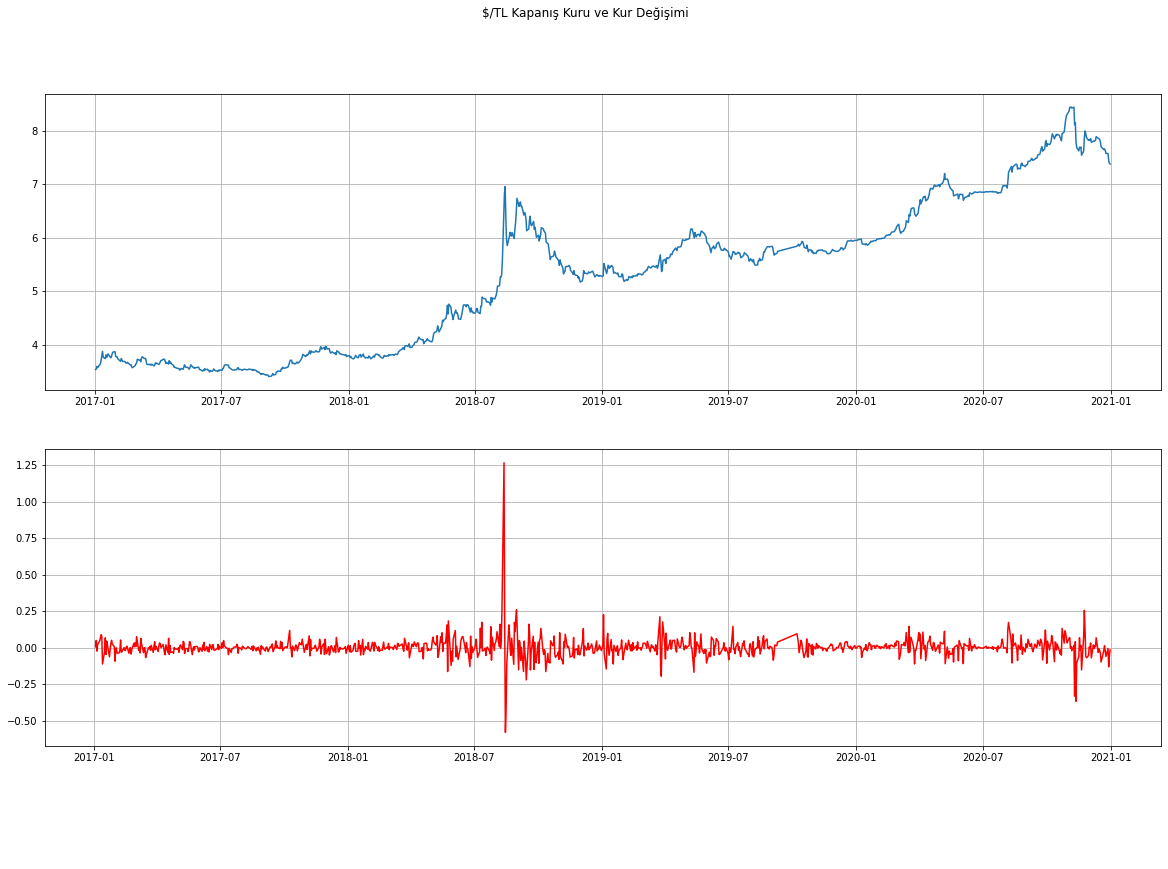

In [ ]:
f = plt.figure(figsize=(20,12))
f.suptitle('$/TL Kapanış Kuru ve Kur Değişimi')
plt.subplot(211)
plt.plot(df['Close'])
plt.grid()
plt.subplot(212)
plt.plot(df['Return'],'r')
f.legend(loc='lower center',bbox_to_anchor=(0.45,-0.015))
plt.grid()
plt.show();


#### **Close** durğan olmayan seri iken birinci farkı alınarak oluşturulan **Return** durağan bir seri gibi görünüyor. Doğruluğunu kanıtlamak için ADF birim kök testlerinden yararlanalım 🔎

In [ ]:
print("Pozitif Getiri:",sum(i for i in df['Return'] if i > 0))
print("Toplam Kaybı:",sum(i for i in df['Return'] if i < 0))

#Return(Getiri) ile ilgili temel istatistikler
print("Modelin Minumun Sayısı:",df['Return'].min())
print("Modelin Maxiumum Sayısı:" ,df['Return'].max())
print("Modelin Kat sayısı:", df['Return'].std())

Pozitif Getiri: 21.034241914749146
Toplam Kaybı: -17.195411682128906
Modelin Minumun Sayısı: -0.5784001350402832
Modelin Maxiumum Sayısı: 1.2657999992370605
Modelin Kat sayısı: 0.07023215933651142


##### Dönem boyunca doların toplam pozitif getirisi ₺210, toplam kaybı ₺171, en düşük günlük kaybı 57 kuruş, en yüksek gün getirisi ₺1,26 olmuştur. Doların Türk Lirası karşılığı getirisinin standart sapması 7 kuruştur.✔️
----------------------------------------------------------------------------------------------------------------------------------------------------------------

# AYKIRI DEĞER TESPİTİ (Outlier Detection)
![](https://miro.medium.com/max/1838/1*2c21SkzJMf3frPXPAR_gZA.png)
Bu uygulama da başvurulan istatiski yöntemler**Z-Skoru,IQR,Box Plot,Histogram Grafiği** sayılabilir

In [ ]:
#Aykırı Değerlerin Tespiti İçin Kütüphanemizi Dahil Ediyoruz
!pip install adtk

Gözlem Sayısı 1021 işlem günü


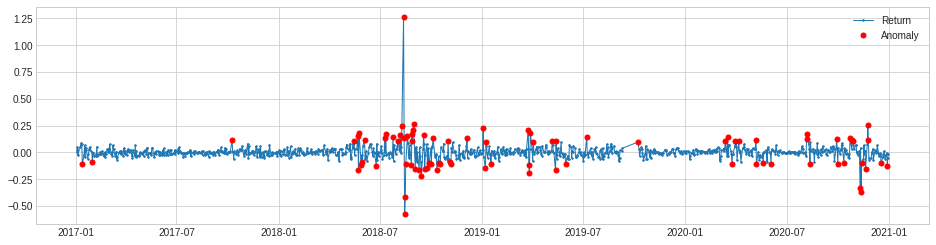

In [ ]:
print('Gözlem Sayısı',len(df),'işlem günü')

#İnterquartil Method
from adtk.detector import InterQuartileRangeAD
iqr_ad = InterQuartileRangeAD(c=1.5)
anomalies = iqr_ad.fit_detect(df['Return'])

#Grafik: Anormal Değişimlerin Görselleştirilmesi:
from adtk.visualization import plot
plot(df['Return'],anomaly=anomalies,ts_linewidth=1,
     ts_markersize=3,anomaly_markersize=5,anomaly_color='red',anomaly_tag="marker");

In [ ]:
not_outlier = anomalies !=1 # Bütün column aykırı değerlerinin seçilmesi
df = df[not_outlier]
print('Gözlem Sayısı',len(df),'işlem günü')

Gözlem Sayısı 936 işlem günü


#### 1021 İşlem Günü Olan Serimiz Aykırı Değerlerin Çıkarılması Sonucu 936 İşlem Gününe Düştü

In [ ]:
#!pip install statsmodels

In [ ]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Return       1
dtype: int64

# **Serilerin Durağan Olup Olmaması**
📌Serilerin durağan olup olmadığı grafiksel olarak anlaşılmadığında ya da emin olunmadığında kullanılan bir test olan, birim kök adı verilen çeşitli istatistiklerden yararlanılmaktadır.

📌 **Augmented Dickey Fuller Testi**: İstatistikte bir zaman serisinin birim kök içerip içermediğini test etmeye yarayan bir işlemdir.

⚠️ Test istatistiğinin olasılık değeri **(p-value>0.05)** ise seri durağan değildir demektedir.

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(df['Close'])
print(f'ADF Statistic:{adf[0]}')
print(f'P-Value :{adf[1]}')
if adf[1] > 0.05:
  print('Seri DUrağan Değildir')
else:
  print('Seri Durağandır.')

ADF Statistic:-0.524711099656491
P-Value :0.8871034180504956
Seri DUrağan Değildir


In [ ]:
df['Return'] = df['Return'].fillna(0)
df.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Return       0
dtype: int64

In [ ]:
adf = adfuller(df['Return'])
print(f'ADF Statistic:{adf[0]}')
print(f'P-Value :{adf[1]}')
if adf[1] > 0.05:
  print('Seri DUrağan Değildir')
else:
  print('Seri Durağandır.')

ADF Statistic:-28.71065549492947
P-Value :0.0
Seri Durağandır.


# Otokorelasyon Fonksiyonu(ACF) Grafiği
 **ACF eğer çok yüksek bir değerden başlayıp çok yavaş küçülüyorsa, bu serinin
durağan olmadığının bir göstergesidir**

📌 En uygun MA terimi sayısı belirlemek için kullanılır

📌 Zamanın o anki noktasında ki gözlemler ile zamanın tüm önceki noktalardaki gözlemler arasındaki korelasyonu görselleştirmektedir.

📌 Eğer PACF'da sivri uçlar mavi bölgeye düşerse AR(n)

📌 PACF'da sivri uçlar mavi bölgeye düşmesi daha kademeli ve uzun oluyorsa  MA(n) kullanılır.

> ⚠️ **Grafik olarak yorumlamak gerekirse her iki model içinde tüm sivri uçların mavi bölge de olması beklenir**

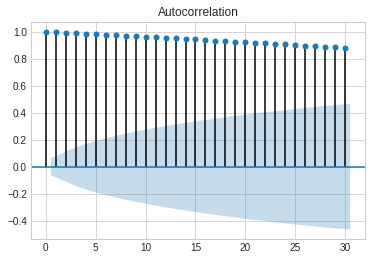

In [ ]:
#Otokorelasyon Grafiği (Close)
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Close'])
plt.show()

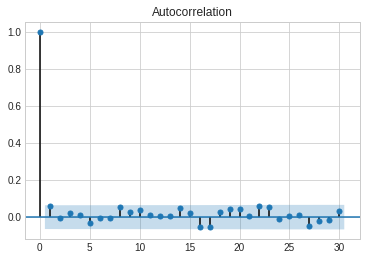

In [ ]:
#Yorumumuz üzere sivri uçlar mavi bölgenin içindedir. | İlk olan başlangıç değeri
#Otokorelasyon Grafiği (Return)
plot_acf(df['Return'])
plt.show()

# Kısmi Otokorelasyon Grafiği
📌Adından da anlaşılacağı üzere ACF'nin bir alt kümesidir.

📌 En uygun AR terimi sayısı belirlemek için kullanılır

> ⚠️ **Grafik olarak yorumlamak gerekirse her iki model içinde tüm sivri uçların mavi bölge de olması beklenir**

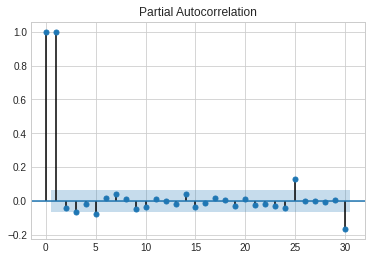

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Close'])
plt.show()

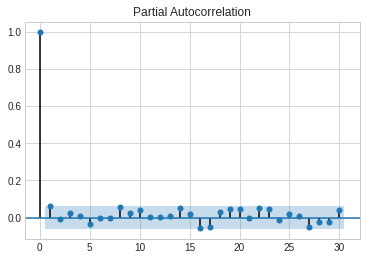

In [ ]:
plot_pacf(df['Return'])
plt.show()

# Seri Normal Dağılıma Sahip Olup Olmaması Kontrolü

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


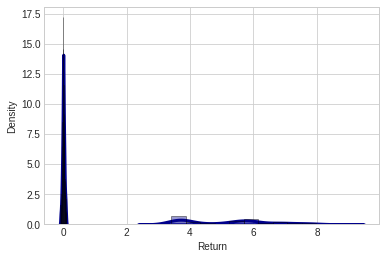

In [ ]:
#Close (Kapanış Fiyatı) için:
sns.distplot(df['Close'],hist=True,kde=True,color='darkblue',
            hist_kws={'edgecolor':'black'},
            kde_kws={'shade':True,'linewidth':3});

#Return (Getiri:Kapanış Fiyatında ki değişim) için:
sns.distplot(df['Return'],hist=True,kde=True,color='darkblue',
            hist_kws={'edgecolor':'black'},
            kde_kws={'shade':True,'linewidth':3});

# Normal Dağılım İçin Jarque-Bera Testi:


In [ ]:
#Close için
from scipy.stats import jarque_bera
stat,p = jarque_bera(df['Close'])
print('Stats=%3.f, p=%3f' %(stat,p))
if p > 0.05:
  print('Normal Dağılıma Sahiptir')
else:
  print('Normal Dağılıma Sahip Değil.')

Stats= 54, p=0.000000
Normal Dağılıma Sahip Değil.


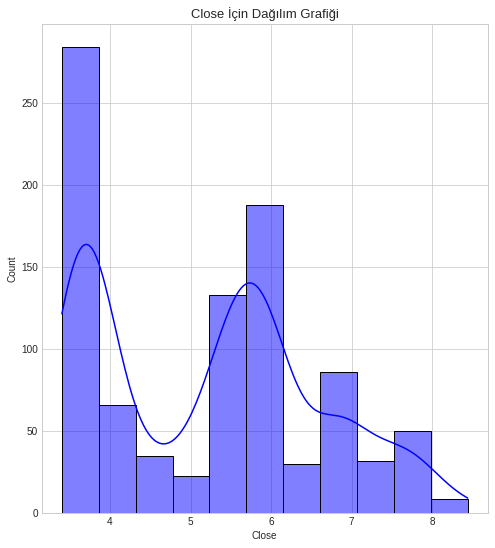

In [ ]:
plt.figure(figsize=(8,9))
sns.histplot(data=df['Close'],kde=True,color='blue',legend=True)
plt.title('Close İçin Dağılım Grafiği',fontsize=13)
plt.show()

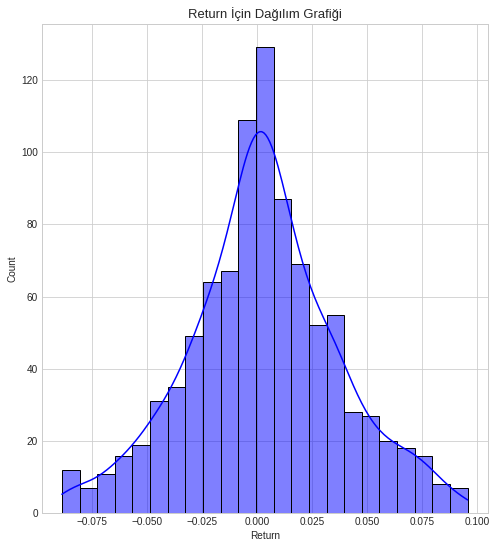

In [ ]:
plt.figure(figsize=(8,9))
sns.histplot(data=df['Return'],kde=True,color='blue',legend=True)
plt.title('Return İçin Dağılım Grafiği',fontsize=13)
plt.show()

In [ ]:
#Return için
stat,p = jarque_bera(df['Return'])
print('Stats=%3.f, p=%3f' %(stat,p))
if p > 0.05:
  print('Normal Dağılıma Sahiptir')
else:
  print('Normal Dağılıma Sahip Değil.')

Stats=  1, p=0.518706
Normal Dağılıma Sahiptir


### Belli bir zaman biriminde bir gözleme ait veriler incelendiğinde bunların bir takım dalgalanmaların etkisi altında kaldığı gözlemlenmiştir. Zaman serilerinin bileşenleri olarak da tanımlayabileceğimiz bu etkiler sırayla;

![picture](https://machinelearningmastery.com/wp-content/uploads/2017/01/Multiplicative-Decomposition-of-Airline-Passenger-Dataset.png)


### 📌 **Trend :**
Bir zaman serisinin uzun bir dönem içerisinde gösterdiği ana eğilime trend adı
verilmektedir. Zaman serilerinde trend yapan kalıplar genellikle seride uzun süreli artışları
veya azalışları yansıtmaktadır. Trend etkisine örnek olarak, demografik özelliklerdeki, coğrafi
dağılımdaki, teknolojik gelişmelerdeki, tüketici zevk ve alışkanlıklarındaki ve fiyatlardaki
değişmeleri vermek mümkündür.

### 📌**Dönemsel Değişim(Seasonality) :**

Mevsimlik dalgalanmalar, zaman serilerinde kolayca
izlenebilen ve sık rastlanan bir etkidir. Periyodik hareketlerle kendini gösterir. Bir yıl ve daha az süre içinde gerçekleşen tam dairesel süreçte mevsim hareketlerinin verilere etkisini ifade eder. Genelde mevsimsel etkiler aylık dönemler itibariyle ortaya çıkar. Mevsimin etkisinde olan değiskenler yılın bazı dönemlerinde diğerlerine oranla daha yüksek veya daha düşük
değerlere ulaşırlar.

✅ Satış rakamları,

✅ Sıcaklık göstergeleri,

✅ Turizm istatistikleri gibi değişkenlere ait verilerde mevsim etkisini görmek mümkündür.
### 📌**Rastgelelik(Randomness)  :**
Periyodik olmayan değişimleri gösterir. Varlığı önceden tahmin edilemeyen tesadüfi olayların ortaya çıkardığı dalgalanmalardır ve hata terimi ile ifade edilebilecek değişmelerdir.
Gürültü(noise) ya da hata bileşeni olarak ifade edilen bu değer, stokastik modeldir.
Örnek olarak,

✅ Doğalfelaketlerin etkisi ile verilerde oluşan artışlar ya da azalmalar verilebilir. 

# Decomposition Plot
> **Bileşenleri Ayırma Grafiği**
* 936 işlem günü olduğu için 931/36 ay == 26 gün aralıklara böleriz


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


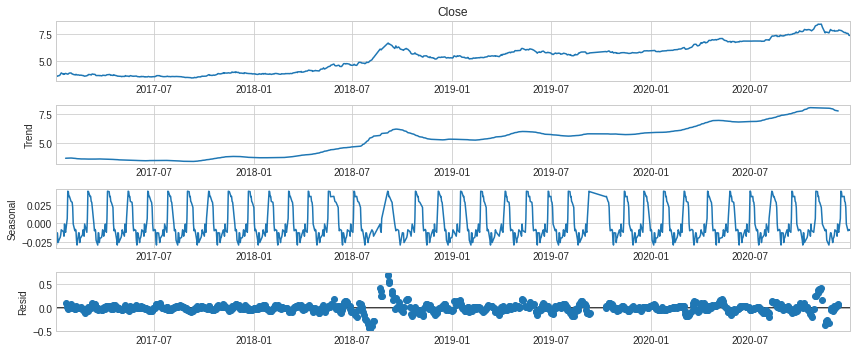

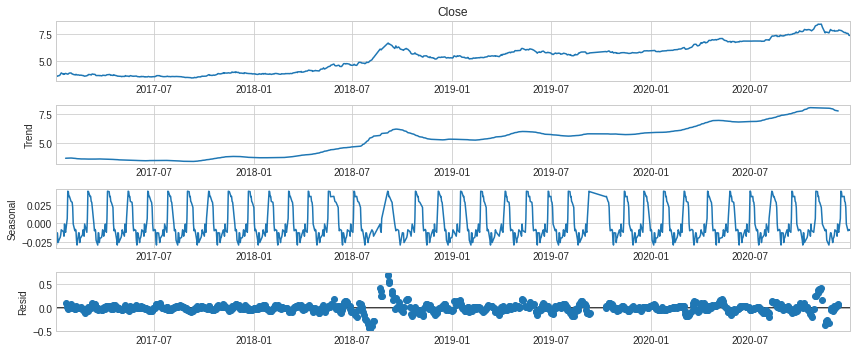

In [ ]:
from pylab import rcParams
rcParams['figure.figsize']=12,5
from statsmodels.tsa.seasonal import seasonal_decompose
rd_res=seasonal_decompose(df['Close'],model='additive',freq=26)
rd_res.plot()

## **BAG GRAFİKLERİNİ SIRASIYLA YORUMU ŞU ŞEKİLDEDİR:**
1️⃣ En üstte zaman serisinin kendisi yer almaktadır

2️⃣ Trend Grafiğidir.Close değişkeni genel olarak yönlü bir eğilime sahiptir. Verinin t zamanda ki değerini tahmin etmek için aynı verinin geçmiş değerlerini modele tahmin edici olarak dahil etmek gerekir.

3️⃣ Dönemsel değişim göstermektedir. Dönemsellik olarak kur içinde dalgaların bulunduğu yorumu yapılabilir.

4️⃣ Beyaz gürültü olarak da isimlendirilen bu grafik hata bileşinini temsil eder

# BAG Değerleri

In [ ]:
print(rd_res.trend)
print('#'*30)
print(rd_res.seasonal)
print('#'*30)
print(rd_res.resid)
print('#'*30)
print(rd_res.observed)

Date
2017-01-02   NaN
2017-01-03   NaN
2017-01-04   NaN
2017-01-05   NaN
2017-01-06   NaN
              ..
2020-12-24   NaN
2020-12-25   NaN
2020-12-28   NaN
2020-12-30   NaN
2020-12-31   NaN
Name: trend, Length: 936, dtype: float64
##############################
Date
2017-01-02   -0.022650
2017-01-03   -0.029188
2017-01-04   -0.012571
2017-01-05   -0.012990
2017-01-06   -0.025846
                ...   
2020-12-24    0.021639
2020-12-25   -0.000871
2020-12-28   -0.009915
2020-12-30   -0.008095
2020-12-31   -0.009298
Name: seasonal, Length: 936, dtype: float64
##############################
Date
2017-01-02   NaN
2017-01-03   NaN
2017-01-04   NaN
2017-01-05   NaN
2017-01-06   NaN
              ..
2020-12-24   NaN
2020-12-25   NaN
2020-12-28   NaN
2020-12-30   NaN
2020-12-31   NaN
Name: resid, Length: 936, dtype: float64
##############################
Date
2017-01-02    3.53490
2017-01-03    3.54190
2017-01-04    3.59230
2017-01-05    3.56937
2017-01-06    3.59191
               ...   
20

# Decomposition Plot
> **Bileşenleri Ayırma Grafiği**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


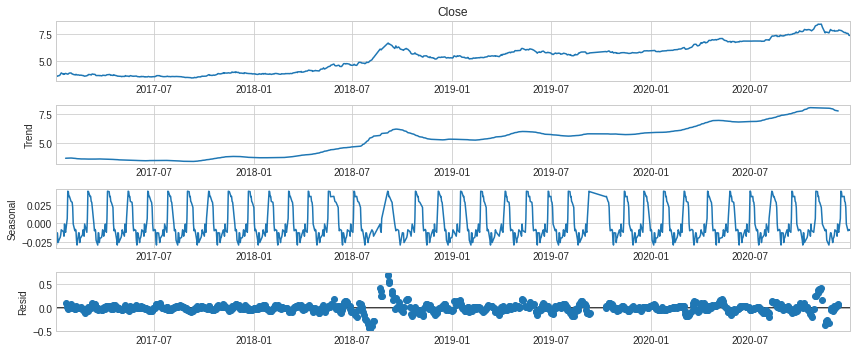

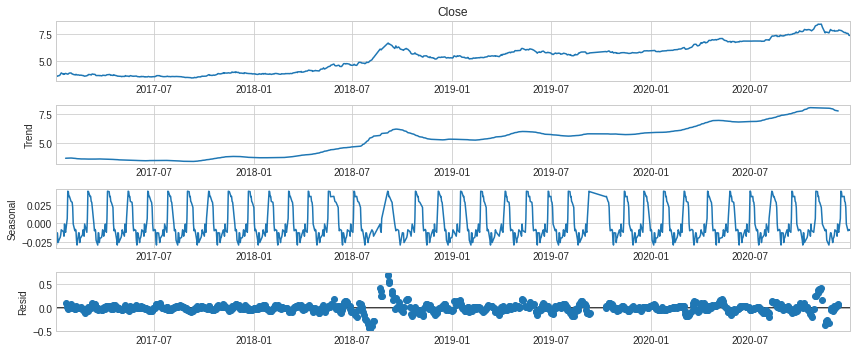

In [ ]:
rd_res1=seasonal_decompose(df['Return'],model='additive',freq=26)
rd_res1.plot()

# ARIMA Modeli İçin Izgara Arama Yöntemi
### 📌 **Akaike bilgi ölçütü (AIC):**
🎯 **AIC - Akaike Information
Criterion, veri kümeleri için istatistiksel bir model
ölçüsüdür. AIC bilgi ölçütünün kullanılmasının en
önemli sebeplerden birisi toplanan veriler ile gerçeğe
en yakın olan modelin seçilmesidir. Belirli standart bir
değeri olmamakla birlikte modelin uyumluluğu ile ters
orantılıdır. AIC değeri ne kadar düşükse modelin o
derece uyumlu olduğu kabul edilmektedir. AIC, ARIMA
modellerinin 𝑝 derecesinin belirlenmesinde
kullanılmaktadır**

### 📌 **Izgara Arama Yöntemi:**

**Hiper parametre optimizasyonlarında ızgara araması
ve manuel arama çok yaygın olarak kullanılan bir
stratejidir.Izgara araması, hiper parametre
boşluğunun belirli alt kümesi aracılığıyla kapsamlı bir
arama sunmaktadır. Izgara araması, uygulanması
ve anlaşılması en kolay yöntem olmakla birlikte düşük
boyutlu alanlarda yüksek verimlilik ve güvenilirlik
sağlamaktadır. Bu yöntemin kullanılması ile
birlikte minimum AIC değerine ulaşmak için elde edilen
bütün kombinasyonlar detaylı bir şekilde
araştırılmaktadır. Fakat bu durum gelecekteki verilerin
tahmin edilmesinde oldukça zaman gerektirmektedir**

In [ ]:
# p,d,q parametrelerini belirlemek için kütüphane
!pip install pmdarima

In [ ]:
import pmdarima as pm 
model = pm.auto_arima(df['Close'],start_p=0,start_q=0,trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2585.505, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2588.435, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2588.120, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2583.221, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-2587.432, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2590.130, Time=0.71 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2587.741, Time=0.46 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2585.089, Time=0.39 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2587.093, Time=0.31 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2589.655, Time=1.32 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-2589.469, Time=0.26 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 4.280 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:       

🛎️ Coef : Tahmin edilen parametre katsayıları

🛎️ SARIMAX(1,1,1) : Modelin (p,d,q) değerleri

🛎️ AIC : Modelin (p,d,q) değerleri için en küçük değer seçilir **||-2590.130||**

🛎️ P>|z| : Tahmin katsayılarının istatistiki anlamlılık testleridir.**P<0.05**  ise tahmin parametresi anlamlıdır.

# Model Teşhis Testleri(Diagnostic Tests)

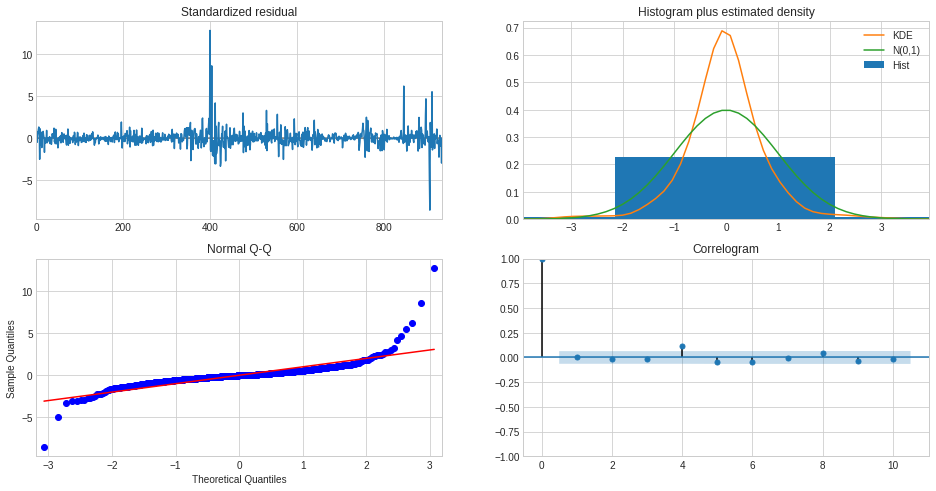

In [ ]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

### ❗ 1. Grafik(standardized residual): Gözlem değerlerinin durağan olup olmaması
### ❗ 2. Grafik (Histogram plus estimated density): Gözlem değerlerinin durağan olup olmaması
### ❗ 3. Grafik(Normal Q-Q): Gözlem değerleri normal dağılıma sahip mi ?  
### ❗ 4. Grafik(Correlogram): Kalıntılar da otokorelasyon var mı ? 
 > ### ✔️✔️ Gibi cevapları bulmamıza yardımcı olur.

# Modeli Gerçek Veriler İle Test Etme
####  📌 2020'nin son işlem gününe kadar olan üç yıllık veriyi ARIMA(1,1,1) ile modelledik. Zaman serimizi ARIMA algoritmasını kullanarak üç yıllık veri üzerinden kur haraketlerini, trendini ve dönemsel değişmeleri öğrendi. Şimdi ise yeni veriler üzerinde test edip modelimizi değerlendirelim.

In [ ]:
!pip install yahoo_fin

In [ ]:
from yahoo_fin.stock_info import *
real = get_data('USDTRY=X', '2021-01-04', '2021-01-31',index_as_date=True)
#Test verimiz Ocak 2021'deki 20 işlem günü kapsamaktadır.

In [ ]:
real.head()

,open,high,low,close,adjclose,volume,ticker
2021-01-04,7.43827,7.43880,7.33900,7.43342,7.43342,0,USDTRY=X
2021-01-05,7.41698,7.42729,7.36147,7.42150,7.42150,0,USDTRY=X
2021-01-06,7.38430,7.39050,7.26380,7.38379,7.38379,0,USDTRY=X
2021-01-07,7.29910,7.38545,7.24080,7.29972,7.29972,0,USDTRY=X
2021-01-08,7.32660,7.40864,7.30495,7.32660,7.32660,0,USDTRY=X


In [ ]:
#Gereksiz Sütünları Düşürelim
real = real.drop(['open','high','low','adjclose','volume','ticker'],axis=1)

# Yeni Veri Setindeki Kurları Tahmin Edelim
#### 🛎️ ARIMA(1,1,1) Modeliyle gelecek olan 20 işlem gününün tahminlerini fc, 
#### 🛎️ Bu tahminlerin güven aralığını (conf_int) elde ediyoruz

In [ ]:
n = len(real) # İşlem Günü
fc,conf_int = model.predict(n_periods=n,return_conf_int=True) # Tahmin 
real['forecast']=pd.DataFrame({'forecast':fc},
                             index=real.index) # Sonuçların real'e eklenmesi

In [ ]:
real.head()

,close,forecast
2021-01-04,7.43342,7.365876
2021-01-05,7.42150,7.361226
2021-01-06,7.38379,7.358920
2021-01-07,7.29972,7.358325
2021-01-08,7.32660,7.358981


# MSE HATA SKORU

In [ ]:
print(f"Mean Squared error:{mean_squared_error(real['close'], fc)}")
#Hata Karelerinin Ortalaması

Mean Squared error:0.0031704862504459744


In [ ]:
print("RMSE:",np.sqrt(mean_squared_error(real['close'],fc)))
#Hata Karelerinin Ortalamasının Karekökünü Alıyoruz

RMSE: 0.056307071051920066


###  🚩 Kurulan model $/₺ kurunu günlük ortalama 5 kuruştan fazla bir fark ile tahmin edebiliyor.

# ALT-SAT Sinyalleri Oluşturma

In [ ]:
real['BUY'] = np.where((real['close'] < real['forecast']),1, 0)
real['SELL'] = np.where((real['close'] >= real['forecast']),1, 0)
#Alım-Satım İşaretcileri
real['BUY_ind'] = np.where((real['BUY']   > real['BUY'].shift(1)),1,0)
real['SELL_ind'] = np.where((real['SELL'] > real['SELL'].shift(1)),1,0)

In [ ]:
real

,close,forecast,BUY,SELL,BUY_ind,SELL_ind
2021-01-04,7.43342,7.365876,0,1,0,0
2021-01-05,7.42150,7.361226,0,1,0,0
2021-01-06,7.38379,7.358920,0,1,0,0
2021-01-07,7.29972,7.358325,1,0,1,0
2021-01-08,7.32660,7.358981,1,0,0,0
2021-01-11,7.35765,7.360552,1,0,0,0
2021-01-12,7.47195,7.362791,0,1,0,1
2021-01-13,7.44696,7.365518,0,1,0,0
2021-01-14,7.39427,7.368602,0,1,0,0
2021-01-15,7.36610,7.371947,1,0,1,0


# Gerçek ve Tahmin Edilmiş Kurların Karşılaştırılması

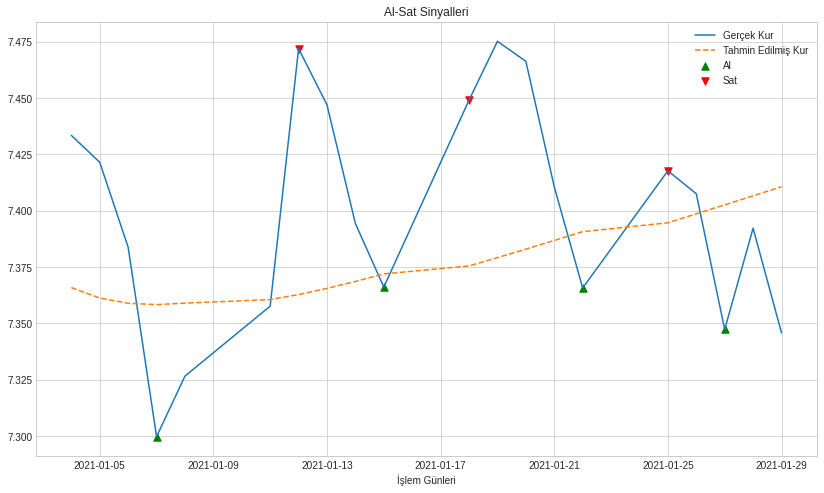

In [ ]:
real['date'] = real.index
fig1 = plt.figure(figsize=(14,8))
plt.plot(real['close'],label='Gerçek Kur')
plt.plot(real['forecast'],label='Tahmin Edilmiş Kur',linestyle='--')
plt.scatter(real.loc[real['BUY_ind'] ==1,  'date'].values,
            real.loc[real['BUY_ind'] ==1,  'close'].values,
            label='Al',color='green', s=55, marker="^")
plt.scatter(real.loc[real['SELL_ind'] ==1,'date'].values,
            real.loc[real['SELL_ind'] ==1,'close'].values,
            label='Sat',color='red',s=55,marker="v")
plt.xlabel('İşlem Günleri')
plt.legend(loc='best')
plt.title('Al-Sat Sinyalleri')
plt.show()

### 📌 5 Ocak 2021 yani Dönem Başında 1000 TL İle İşleme Başlayan Biri, Ocak Ayının Sonunda Ne Olacağını Hesaplayalım.

In [ ]:
real['Return_pct'] = real['close'].pct_change().shift(-1)

#1000 Tl'lik Yatırımın günlük değeri
real['Value']=1000*(1+(np.where(real['BUY']==1,
                                real['Return_pct'],0).cumsum()))
real['Value']=real['Value'].shift(1) #Getirinin Yansıması Ertesi Gün

#Yatırımın Durum Raparo
print('===============Yatırım Durum Raporu===================')
print("Dönem Başındaki ₺1000",len(real),"günde ₺",real['Value'][-1].round(2),"Olmuştur")

===============Yatırım Durum Raporu===================
Dönem Başındaki ₺1000 20 günde ₺ 1041.62 Olmuştur


In [ ]:
real.dtypes

close                float64
forecast             float64
BUY                    int64
SELL                   int64
BUY_ind                int64
SELL_ind               int64
date          datetime64[ns]
Return_pct           float64
Value                float64
dtype: object

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8378 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8378 missing from current font.
  font.set_text(s, 0, flags=flags)


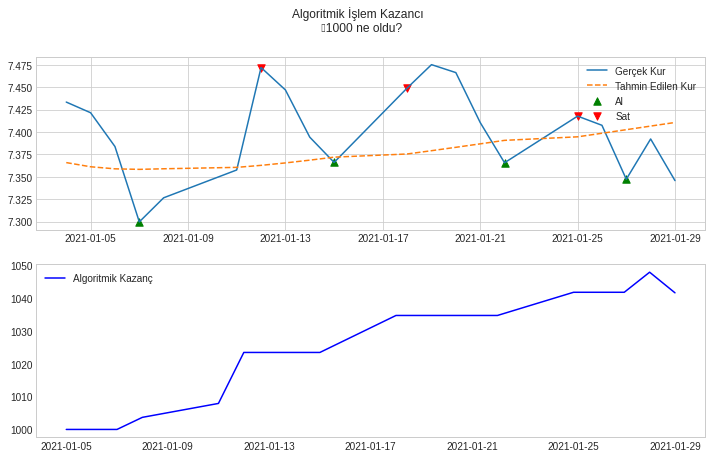

In [ ]:
real['date']=real.index
f,axarr = plt.subplots(2,sharex=False,figsize=(12,7))

f.suptitle('Algoritmik İşlem Kazancı \n ₺ 1000 ne oldu?')

axarr[0].plot(real['close'],label='Gerçek Kur')

axarr[0].plot(real['forecast'],label='Tahmin Edilen Kur',linestyle='--')

axarr[0].scatter(real.loc[real['BUY_ind']==1,'date'].values,
                 real.loc[real['BUY_ind']==1,'close'].values,
                 label='Al',color='green', s=55, marker="^")

axarr[0].scatter(real.loc[real['SELL_ind']==1,'date'].values,
                 real.loc[real['SELL_ind']==1,'close'].values,
                 label='Sat',color='red', s=55, marker="v")
axarr[0].legend(loc='best')
axarr[1].plot(real['Value'],'b',label='Algoritmik Kazanç')
axarr[1].grid()
axarr[1].legend(loc='best')
plt.show();

## Güven Aralığı , Gerçek ve Tahmin Edilen Değerler

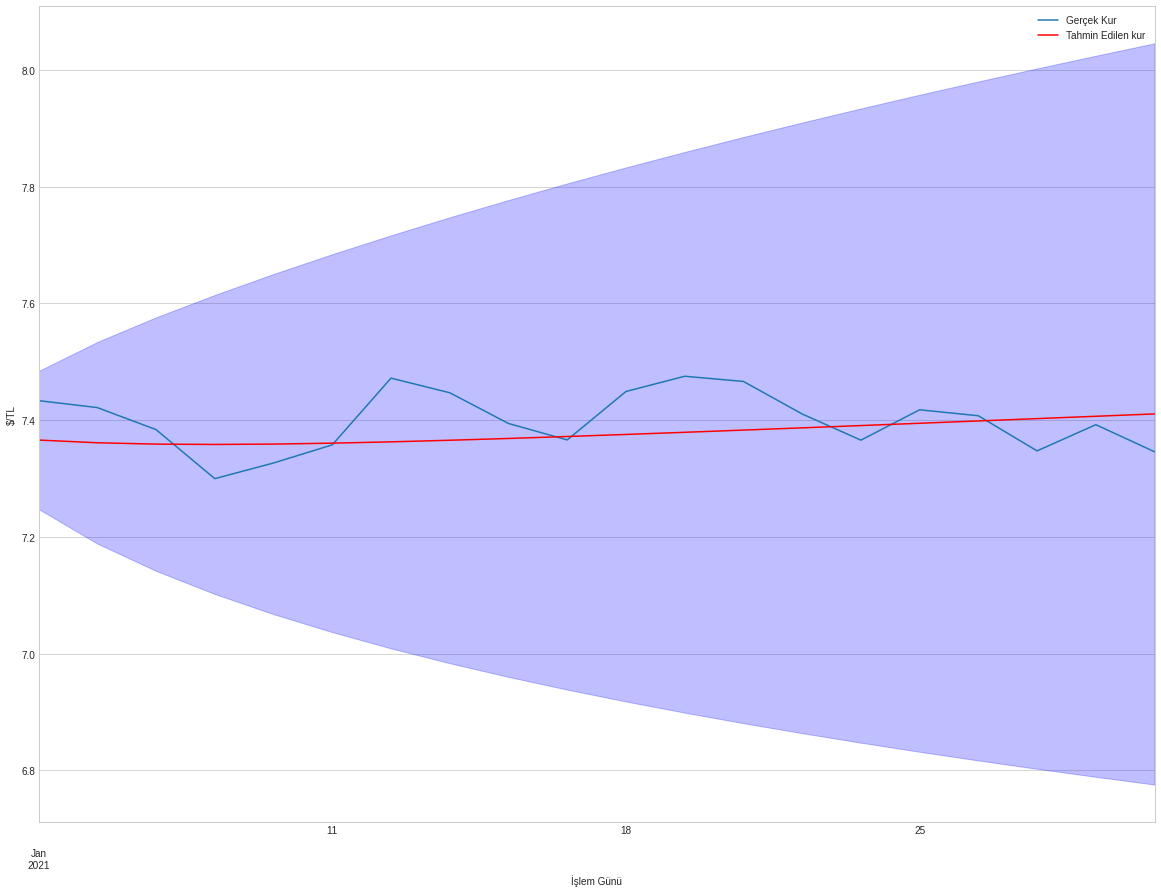

In [ ]:
ax = real['close'].plot(label='Gerçek Kur',figsize=(20,15))
real['forecast'].plot(ax=ax,label='Tahmin Edilen kur',color='r')
ax.fill_between(real['forecast'].index,
                conf_int[:,0],
                conf_int[:,1], color='b',alpha=.25)
ax.set_xlabel('İşlem Günü')
ax.set_ylabel('$/TL')
plt.legend()
plt.show()

<h1 class="list-group-item list-group-item-action active" id="missing_value">📚Yararlanılan Kaynaklar📚</h1>

1. <a href="https://avys.omu.edu.tr/storage/app/public/vceyhan/125939/DURA%C4%9EANLIK%20TESP%C4%B0T%C4%B0%20VE%20TESTLER%C4%B0.pdf">Durağanlık Tespiti ve Testleri</a>
2. <a href="https://www.academia.edu/1903282/Dura%C4%9Fanl%C4%B1k_ve_Birim_K%C3%B6k_S%C4%B1namalar%C4%B1_Sunum_EViews_ADF_Uygulamas%C4%B1_">Durağanlık ve Birim Kök</a>
3. <a href="https://www.researchgate.net/publication/321724640_Zaman_serilerinin_analizi_ve_ARIMA_modelleri">Zaman Serilerinin Analizi ve ARIMA Modelleri</a>
4.  = Sorhun, E.(2021).Python İle Makine Öğrenmesi,İstanbul: Abaküs
> <a href="https://www.abakuskitap.com/urun/python-ile-makine-ogrenmesi">Python İle Makine Öğrenmesi</a>
5.  <a href="http://auzefkitap.istanbul.edu.tr/kitap/ekonometri_ue/zamanserilerianalizi.pdf">Zaman Serileri Analizi İTÜ</a>



### Buraya Kadar Geldiysen Veri Bilimine Olan İlgin Bir Harika ✨😍
> **Mikail Doğruer**